# intially i will do it without data augmentaion too see how much of an accuracy jump am i getting ...

In [1]:
# pip install opencv-python

In [2]:
import cv2
import os
import random
import numpy as np

In [3]:
my_dir = 'dog_cat_data/train'
categories = ['cat','dog']

In [4]:
data = []
for i in categories:
    folder_path = os.path.join(my_dir, i)

    if i == 'cat':
        label = 0
    else:
        label = 1
        
    for j in os.listdir(folder_path):
        img_path = os.path.join(folder_path, j)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(150,150))
        data.append([img,label])
        

In [5]:
random.shuffle(data)

In [6]:
X = []
y = []

for i in data:
    X.append(i[0])
    y.append(i[1])

X = np.array(X)
y = np.array(y)

In [7]:
X.shape

(2000, 150, 150, 3)

In [8]:
X = X/255

In [9]:
pip install numpy==1.26.4


Note: you may need to restart the kernel to use updated packages.


In [10]:
# create CNN from here
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

/Users/praveenk/Documents/Deep_learning/tf-metal/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-28 19:22:51.633852: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-07-28 19:22:51.633872: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-28 19:22:51.633878: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-07-28 19:22:51.633890: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-28 19:22:51.633898: I tensorflow/core/common_runtime/pluggable_device/plug

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,212,513 (4.63 MB)

 Trainable params: 1,212,513 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.16.2
Num GPUs Available: 1


In [15]:
history = model.fit(X,y, epochs=5, validation_split=0.1)

Epoch 1/5


2025-07-28 19:22:52.342159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4771 - loss: 0.8490 - val_accuracy: 0.5750 - val_loss: 0.6889
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5900 - loss: 0.6863 - val_accuracy: 0.5200 - val_loss: 0.9825
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5956 - loss: 0.7064 - val_accuracy: 0.4800 - val_loss: 0.8827
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6359 - loss: 0.6605 - val_accuracy: 0.5450 - val_loss: 0.7147
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6547 - loss: 0.6128 - val_accuracy: 0.5750 - val_loss: 0.7605


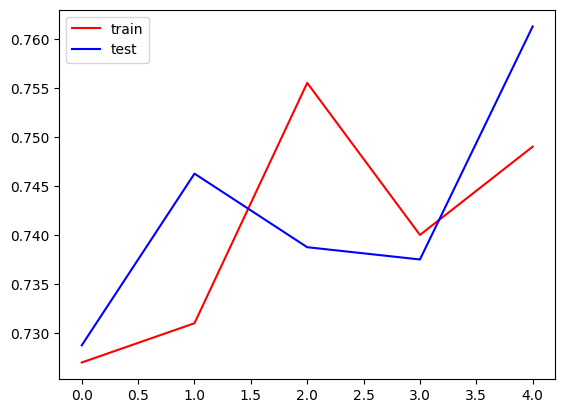

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

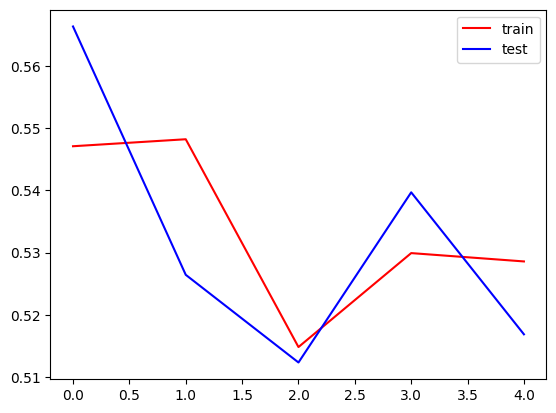

In [40]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

lets do some data augmentation .... hehehehheaaaaaahahahhhaaaaaah

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

# this is the augmentaion configuration we will use for testing: only rescaling
test_datagen = ImageDataGenerator( rescale=1./255 )

# this a generator that will read pictures found in the folder /dog_cat_data/train and indefinetly generate augmented image data

train_generator = train_datagen.flow_from_directory(
        'dog_cat_data/train',
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
        'dog_cat_data/valid',
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
# same model as before used

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=2000 // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=800 // batch_size
)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.7343 - loss: 0.5484 - val_accuracy: 0.7287 - val_loss: 0.5663
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7192 - loss: 0.5621 - val_accuracy: 0.7462 - val_loss: 0.5264
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7413 - loss: 0.5331 - val_accuracy: 0.7387 - val_loss: 0.5123
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7390 - loss: 0.5438 - val_accuracy: 0.7375 - val_loss: 0.5397
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7640 - loss: 0.5026 - val_accuracy: 0.7613 - val_loss: 0.5169


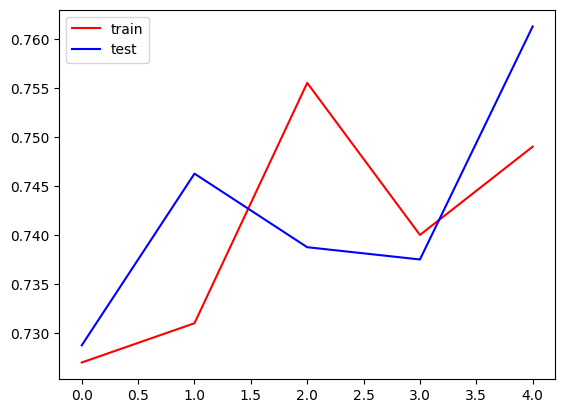

In [41]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

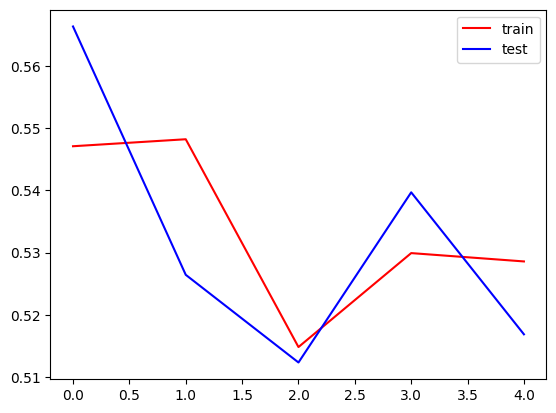

In [42]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()